In [31]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

In [32]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)

z = np.zeros((3,len(x)))

z[0] = 2*x - 2
z[1] = -0.5*x + 0.5
z[2] = 4-x

In [33]:
A = np.array([[2,-1],[1,2],[1,1]])
b = np.array([2,1,4])
At = A.T
M = np.dot(At,A)
bt = np.dot(At,b)
xsol = np.linalg.solve(M,bt)
xsol

array([1.42857143, 0.42857143])

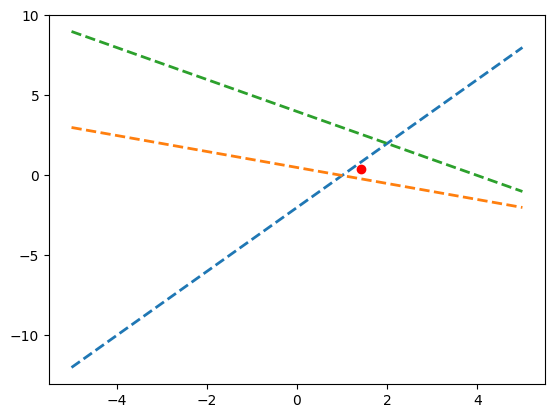

In [34]:
for l in range(z.shape[0]):
    plt.plot(x,z[l],ls='--',lw=2)
plt.scatter(xsol[0],xsol[1],color='r')

De esto podemos comprender que este es un sistema no lineal y que la respuesta es sólo un acercamiento, ya que un hay un punto que las tres rectas compartan.

In [35]:
line1 = lambda x: 2*x - 2
line2 = lambda x: -0.5*x + 0.5
line3 = lambda x: 4-x

def distance(x,line):
    return abs(line(x)) / np.sqrt(line(x)**2 + 1)

min_distance = float('inf')
min_x = min_y = 0
d = []
step = 0.01
for x in np.arange(-5, 5, step):
    dist1 = distance(x,line1)
    dist2 = distance(x,line2)
    dist3 = distance(x,line3)
    total_dist = dist1 + dist2 + dist3
    d.append(total_dist)
    if total_dist < min_distance:
        min_distance = total_dist
        min_x = x
        if dist1 == min(dist1, dist2, dist3):
            min_y = line1(min_x)
        elif dist2 == min(dist1, dist2, dist3):
            min_y = line2(min_x)
        else:
            min_y = line3(min_x)

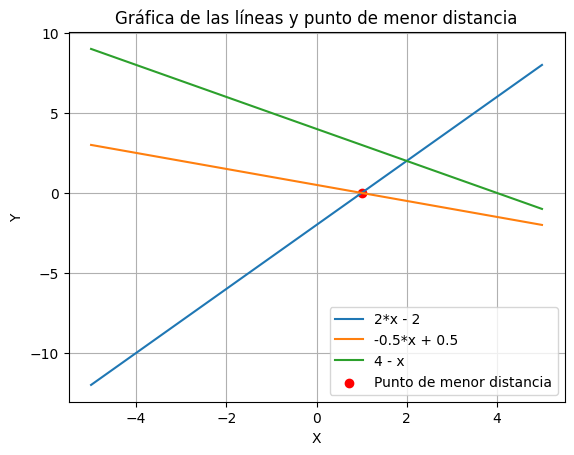

In [36]:
x_vals = np.linspace(-5, 5, 100)
plt.plot(x_vals, line1(x_vals), label='2*x - 2')
plt.plot(x_vals, line2(x_vals), label='-0.5*x + 0.5')
plt.plot(x_vals, line3(x_vals), label='4 - x')

plt.scatter(round(min_x, 5), round(min_y, 5), color='red', label='Punto de menor distancia')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfica de las líneas y punto de menor distancia')
plt.legend()
plt.grid(True)
plt.show()

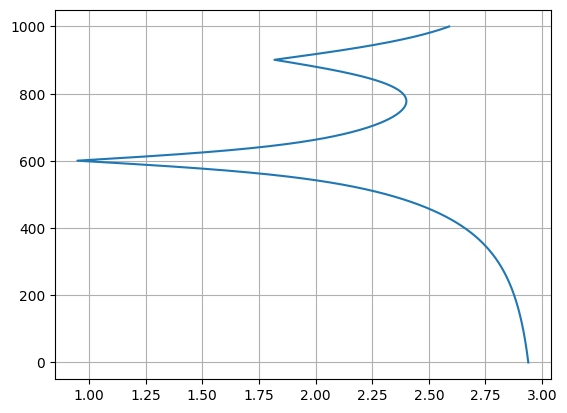

In [37]:
x_vals = np.linspace(-5, 5, 100)
plt.plot(d, np.linspace(0, len(d), len(d)))
plt.grid(True)
plt.show()

In [38]:
min_x, min_y

(0.9999999999998721, 6.394884621840902e-14)

Podemos ver que mientras un método nos devuelve valores con (1, 0), el otro nos devuelve valores más o menos 0.42 más altos. Es decir, haciendo un for y pasos no estamos obteniendo algo tan preciso como antes